In [159]:
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'xtick.color':'w','ytick.color':'w','axes.labelcolor':'gold'})
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
dame =  pd.read_csv('2D_example_dame.csv',header=None)

In [85]:
dame.head()
dame.dropna()
X1_median = dame[1].median()
X2_median = dame[2].median()
dame =  pd.read_csv('2D_example_dame.csv',header=None)

In [73]:
y =  dame[0].values

In [74]:
y.shape

(20,)

In [115]:
X =  dame.iloc[:,1:].values

In [96]:
np.isnan(X[:,0])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False])

In [98]:
X[:,0][np.isnan(X[:,0])] = X1_median # X０にするべきやった。
X[:,0]

array([-7.428476e+00,  2.980693e+00,  3.988255e+00, -5.789437e+00,
       -4.894447e+00, -1.933949e+00, -1.611771e+00, -6.670152e+00,
       -2.931415e+02, -7.476200e-02, -2.691793e+00,  4.611820e-01,
       -1.354135e+00, -6.229476e+00,  2.778594e+00, -5.719578e+00,
        9.283220e-01,  8.504750e-01, -1.611771e+00,  1.116025e+00])

In [99]:
X[:,1][np.isnan(X[:,1])] = X2_median # X1にするべきやったな。
X[:,1]

array([ 1.509903e+00,  1.960821e+00,  4.636389e+00, -4.621614e+00,
       -3.269730e+02, -4.727600e-02,  5.932201e+00, -1.036282e+00,
       -1.044750e-01,  1.070002e+00,  4.168774e+00,  3.453438e+00,
        3.751657e+00, -1.209434e+00,  1.509903e+00, -2.435090e-01,
        3.208520e+00,  2.908955e+00, -1.831199e+00,  3.353602e+00])

データの大きさにグラフを合わせる


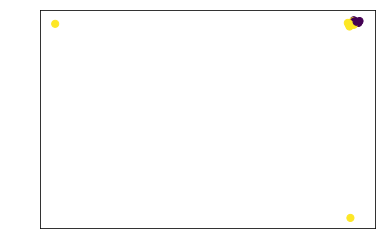

In [100]:
plt.scatter(X[:,0],X[:,1],c=y,s=50)
print('データの大きさにグラフを合わせる')

(-10, 10)

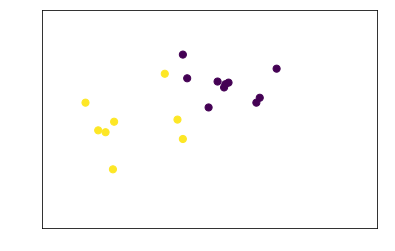

In [102]:
plt.scatter(X[:,0],X[:,1],c=y,s=50)
plt.xlim(-10,10)
plt.ylim(-10,10)

In [109]:
# 外れ値をなくす。
X2 =  X[(abs(X[:,0]) < 10) & (abs(X[:,1]) < 10)]
y2 =  y[(abs(X[:,0]) < 10) & (abs(X[:,1]) < 10)] # yで対応した部分を削除する
X2,X2.shape

(array([[-7.428476,  1.509903],
        [ 2.980693,  1.960821],
        [ 3.988255,  4.636389],
        [-5.789437, -4.621614],
        [-1.933949, -0.047276],
        [-1.611771,  5.932201],
        [-6.670152, -1.036282],
        [-0.074762,  1.070002],
        [-2.691793,  4.168774],
        [ 0.461182,  3.453438],
        [-1.354135,  3.751657],
        [-6.229476, -1.209434],
        [ 2.778594,  1.509903],
        [-5.719578, -0.243509],
        [ 0.928322,  3.20852 ],
        [ 0.850475,  2.908955],
        [-1.611771, -1.831199],
        [ 1.116025,  3.353602]]), (18, 2))

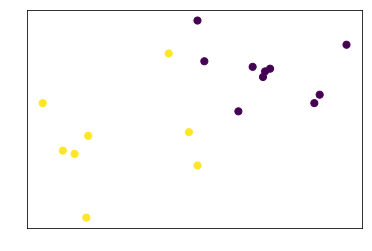

In [111]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50); # 色分けcはy2に合わせる

nanを埋める方法

In [112]:
from sklearn.preprocessing import Imputer

In [119]:
miss_v_mean =  Imputer() # defaltは平均

In [117]:
X
miss_v_mean.fit(X) # 平均で学習

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [118]:
X_new_mean =  miss_v_mean.transform(X) # 平均を埋める

In [121]:
miss_v_median = Imputer(strategy='median')

In [124]:
X
miss_v_median.fit(X) # 中央値で学習

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [126]:
X_new_median = miss_v_median.transform(X)
X_new_median


array([[-7.428476e+00,  1.509903e+00],
       [ 2.980693e+00,  1.960821e+00],
       [ 3.988255e+00,  4.636389e+00],
       [-5.789437e+00, -4.621614e+00],
       [-4.894447e+00, -3.269730e+02],
       [-1.933949e+00, -4.727600e-02],
       [-1.611771e+00,  5.932201e+00],
       [-6.670152e+00, -1.036282e+00],
       [-2.931415e+02, -1.044750e-01],
       [-7.476200e-02,  1.070002e+00],
       [-2.691793e+00,  4.168774e+00],
       [ 4.611820e-01,  3.453438e+00],
       [-1.354135e+00,  3.751657e+00],
       [-6.229476e+00, -1.209434e+00],
       [ 2.778594e+00,  1.509903e+00],
       [-5.719578e+00, -2.435090e-01],
       [ 9.283220e-01,  3.208520e+00],
       [ 8.504750e-01,  2.908955e+00],
       [-1.611771e+00, -1.831199e+00],
       [ 1.116025e+00,  3.353602e+00]])

(-10, 10)

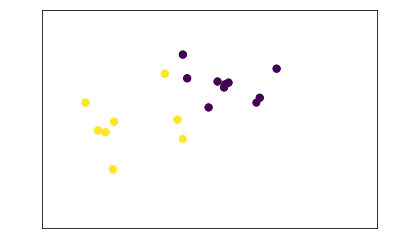

In [128]:

plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50); # 2次元散布図でプロット
plt.scatter(X_new_median[:, 0], X_new_median[:, 1], c=y, s=50); # 2次元散布図でプロット
plt.xlim(-10,10)
plt.ylim(-10,10)

In [129]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [140]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [141]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [142]:
from sklearn.feature_selection import SelectKBest # ベストな特徴量を撰択してくれる。
from sklearn.feature_selection import chi2

In [143]:
skb = SelectKBest(chi2,k=20)

In [145]:
skb.fit(X_train,y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x1a22158e18>)

In [146]:
X_train_new =  skb.transform(X_train)

In [148]:
X_train_new.shape,X_train.shape

((455, 20), (455, 30))

In [152]:
skb.get_support() # 使われた次元を表示 ture of false

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False])

In [150]:
data.feature_names[skb.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], dtype='<U23')

In [161]:
data.feature_names[~skb.get_support()] # 必要ないと見なされた特徴量

array([], dtype='<U23')

In [155]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [160]:
from sklearn.model_selection import StratifiedKFold

k_range = np.arange(1, 31)
scores = []
std = []

for k in k_range:
    ss = StratifiedKFold( n_splits=10,shuffle=True,random_state=2)
    score = []
    
    for train_index,val_index in ss.split(X_train,y_train):
        X_train2, X_val = X[train_index], X[val_index]
        y_train2, y_val = y[train_index], y[val_index]
        skb =  SelectKBest(chi2,k=k)
        skb.fit(X_train2,y_train2)
        
        X_new_train2 =  skb.transform(X_train2)
        X_new_val = skb.transform(X_val)
        
        clf.fit( X_new_train2,y_train2)
        score.append(clf.score(X_new_val,y_val))
    scores.append( np.array(score).mean())
    std.append(np.array(score).std())
scores =  np.array( scores)
std =  np.array(std)

In [164]:
k_range,scores,std

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([0.90777778, 0.93198068, 0.9231401 , 0.91879227, 0.9342029 ,
        0.9384058 , 0.94280193, 0.94497585, 0.95164251, 0.95830918,
        0.95613527, 0.95613527, 0.95826087, 0.95391304, 0.95391304,
        0.95391304, 0.95391304, 0.95608696, 0.95608696, 0.95391304,
        0.95608696, 0.95608696, 0.95391304, 0.95608696, 0.95608696,
        0.962657  , 0.962657  , 0.962657  , 0.962657  , 0.962657  ]),
 array([0.03645756, 0.03152765, 0.03557829, 0.03659174, 0.03381146,
        0.02589953, 0.02843536, 0.02856985, 0.02923999, 0.03034113,
        0.03115908, 0.03115908, 0.03183073, 0.02864225, 0.02864225,
        0.02864225, 0.02864225, 0.02956778, 0.02792375, 0.02864225,
        0.02792375, 0.02792375, 0.02864225, 0.02956778, 0.02792375,
        0.03278984, 0.03278984, 0.03278984, 0.03278984, 0.03278984]))

Text(0, 0.5, 'score')

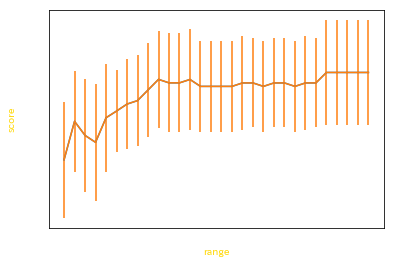

In [165]:
plt.plot(k_range,scores)
plt.errorbar(k_range,scores,yerr=std)
plt.xlabel('range')
plt.ylabel('score')

Text(0, 0.5, 'error rate')

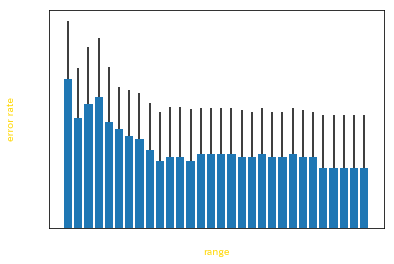

In [172]:
plt.bar(k_range,1-scores,yerr= [np.zeros(std.shape),std]) # 標準偏差 0~正の値まで
plt.xlabel('range')
plt.ylabel('error rate')

In [168]:
[np.zeros(std.shape),std]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.03645756, 0.03152765, 0.03557829, 0.03659174, 0.03381146,
        0.02589953, 0.02843536, 0.02856985, 0.02923999, 0.03034113,
        0.03115908, 0.03115908, 0.03183073, 0.02864225, 0.02864225,
        0.02864225, 0.02864225, 0.02956778, 0.02792375, 0.02864225,
        0.02792375, 0.02792375, 0.02864225, 0.02956778, 0.02792375,
        0.03278984, 0.03278984, 0.03278984, 0.03278984, 0.03278984])]

In [174]:
best_k =  k_range[np.argmax(scores)] # 一番スコアのいい値を取り出す。
best_k

26

In [176]:
skb = SelectKBest(chi2,k=best_k)
skb.fit(X_train,y_train)

SelectKBest(k=26, score_func=<function chi2 at 0x1a22158e18>)

In [177]:
X_train_best = skb.transform(X_train)
X_test_best  = skb.transform(X_test)
clf.fit(X_train_best, y_train)
clf.score(X_test_best, y_test)
clf.fit(X_train, y_train);
clf.score(X_test, y_test)

0.956140350877193